**Introduction**

Predicting Employee Leaving using Machine Learning

**About Dataset:** This dataset contains data of 300k employee who are working for an organisation. this dataseet contains features such as gender, Distance to the office, years worked, their previous salary and current, their personal review and supervisor's review

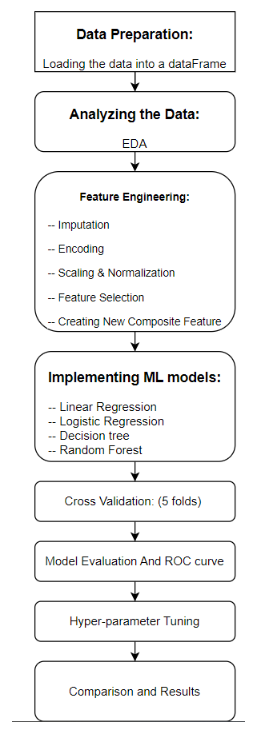

# Employee Turnover Analysis and Prediction
**Objective**: The goal of this project is to analyze factors contributing to employee turnover, identify potential indicators, and predict which employees are likely to leave at the end of the year. By understanding these indicators, the organization can implement targeted interventions to reduce employee turnover.

---

## 1. Import Libraries and Load Data
In this section, we import the necessary libraries and load the data for initial exploration.


In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# !pip install gspread gspread_dataframe
# !pip install --upgrade gspread gspread_dataframe



In [2]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\hp\Desktop\employee_departure_dataset.csv"

# Load data into a DataFrame
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,8,45,1,18,3,10,...,1,5,3,1,59K,60K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,73,5,7,5,19,...,7,9,3,7,61K,64K,4.0,4.0,2,0
2,2,1002334,0,<5mile,6,65,1,13,2,7,...,8,4,3,1,61K,63K,4.0,4.0,3,0
3,3,1002335,0,~15miles,7,18,4,14,3,3,...,3,4,4,5,58K,61K,5.0,5.0,7,0
4,4,1002336,1,~20miles,7,73,5,10,1,18,...,5,1,6,3,61K,62K,5.0,5.0,5,0


---

## 2. Data Overview
Let's take a quick look at the shape of the data, its columns, and some initial rows to understand its structure.


In [3]:
df.shape

(300000, 31)

In [4]:
# Check for missing values in each column
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Unnamed: 0                   0
RecordId                     0
Gender                       0
Distance                   266
YearsWorked                  0
TrainingHours                0
WorkLifeBalance              0
NumOfProjects                0
JobInvolvement               0
TeamSize                     0
MentorshipReceived           0
TechSkillLevel               0
AttendanceRate               0
StressLevel                  0
PeerFeedbackScore            0
AnnualLeaveDays              0
Dependents                   0
Certifications               0
OnsiteOpportunities          0
SkillDevelopmentCourses      0
ProjectComplexity            0
WorkSatisfactionScore        0
JobEngagementScore           0
PhysicalActivityScore        0
MentalWellbeingScore         0
PreviousSalary               0
Salary                       0
SelfReview                 596
SupervisorReview           577
DepartmentCode               0
Left                         0
dtype: 

In [5]:
# dropping the unnamed and recordId column as it does not add any value
df = df.drop(['Unnamed: 0','RecordId'], axis=1)

In [6]:
# Checking for missing values in each column
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Gender                       0
Distance                   266
YearsWorked                  0
TrainingHours                0
WorkLifeBalance              0
NumOfProjects                0
JobInvolvement               0
TeamSize                     0
MentorshipReceived           0
TechSkillLevel               0
AttendanceRate               0
StressLevel                  0
PeerFeedbackScore            0
AnnualLeaveDays              0
Dependents                   0
Certifications               0
OnsiteOpportunities          0
SkillDevelopmentCourses      0
ProjectComplexity            0
WorkSatisfactionScore        0
JobEngagementScore           0
PhysicalActivityScore        0
MentalWellbeingScore         0
PreviousSalary               0
Salary                       0
SelfReview                 596
SupervisorReview           577
DepartmentCode               0
Left                         0
dtype: int64


In [7]:
# Planning to use these as categorical feature in further analysis hence filling mode
df['Distance'] = df['Distance'].fillna(df['Distance'].mode()[0])
df['SelfReview'] = df['SelfReview'].fillna(df['SelfReview'].mode()[0])
df['SupervisorReview'] = df['SupervisorReview'].fillna(df['SupervisorReview'].mode()[0])

In [8]:
# Data Types of Columns
print(df.dtypes)

Gender                       int64
Distance                    object
YearsWorked                  int64
TrainingHours                int64
WorkLifeBalance              int64
NumOfProjects                int64
JobInvolvement               int64
TeamSize                     int64
MentorshipReceived           int64
TechSkillLevel               int64
AttendanceRate             float64
StressLevel                  int64
PeerFeedbackScore            int64
AnnualLeaveDays              int64
Dependents                   int64
Certifications               int64
OnsiteOpportunities          int64
SkillDevelopmentCourses      int64
ProjectComplexity            int64
WorkSatisfactionScore        int64
JobEngagementScore           int64
PhysicalActivityScore        int64
MentalWellbeingScore         int64
PreviousSalary              object
Salary                      object
SelfReview                 float64
SupervisorReview           float64
DepartmentCode               int64
Left                

In [9]:
# Previous Salary and Salary data type is object. However, it should be float and k should be 1000 i.e 60k should be 60000

df['PreviousSalary'] = df['PreviousSalary'].astype(str).str.replace('K', '000').astype(float)
df['Salary'] = df['Salary'].astype(str).str.replace('K', '000').astype(float)

# Verifying the change
print(df[['PreviousSalary', 'Salary']].sample(5))

        PreviousSalary   Salary
218757         54000.0  56000.0
171686         62000.0  64000.0
47489          58000.0  60000.0
29041          64000.0  65000.0
58925          56000.0  59000.0


 The unique values in distance column are 5


<Axes: xlabel='Distance', ylabel='count'>

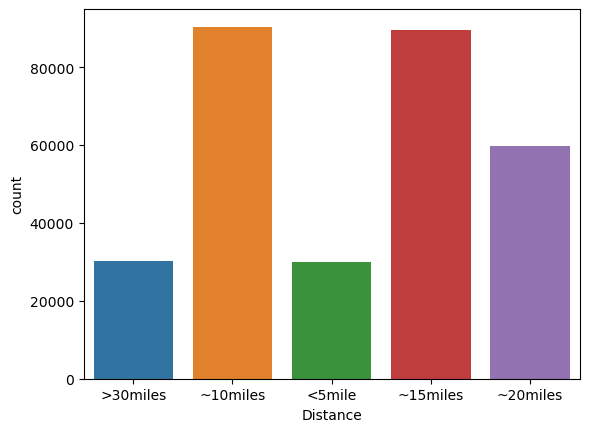

In [10]:
# From the data types section it can be identified that the data type of distance is object. Checking if it should be chaged to numbers
print(f" The unique values in distance column are {df['Distance'].nunique()}")

sns.countplot(data = df, x = 'Distance')


As there are only 5 values this can be used as a category instead of distance as miles

In [11]:
df.describe()

,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,AttendanceRate,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
count,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.401043,6.999463,49.56185,2.997280,10.016793,3.001797,9.999680,0.498273,2.998253,89.996077,...,4.994403,4.997240,4.996777,4.996520,59509.736667,61317.523333,4.400287,4.103140,3.997480,0.309633
std,0.490111,1.871401,28.81723,1.414951,5.484806,1.413865,5.472419,0.499998,1.413533,5.773993,...,2.579983,2.578817,2.582293,2.582018,2985.451653,3167.011583,0.663213,0.943768,2.161085,0.462343
min,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000075,...,1.000000,1.000000,1.000000,1.000000,42000.000000,43000.000000,3.000000,2.000000,1.000000,0.000000
25%,0.000000,6.000000,25.00000,2.000000,5.000000,2.000000,5.000000,0.000000,2.000000,84.986555,...,3.000000,3.000000,3.000000,3.000000,58000.000000,59000.000000,4.000000,4.000000,2.000000,0.000000
50%,0.000000,7.000000,50.00000,3.000000,10.000000,3.000000,10.000000,0.000000,3.000000,89.988180,...,5.000000,5.000000,5.000000,5.000000,60000.000000,61000.000000,5.000000,4.000000,3.000000,0.000000
75%,1.000000,8.000000,75.00000,4.000000,15.000000,4.000000,15.000000,1.000000,4.000000,95.003488,...,7.000000,7.000000,7.000000,7.000000,62000.000000,63000.000000,5.000000,5.000000,6.000000,1.000000
max,1.000000,14.000000,99.00000,5.000000,19.000000,5.000000,19.000000,1.000000,5.000000,99.999999,...,9.000000,9.000000,9.000000,9.000000,70000.000000,74000.000000,5.000000,5.000000,7.000000,1.000000


Some variables have different rages and need to be scaled before applying in the ML model to make it ideal

Text(0.5, 1.0, 'Left distribution')

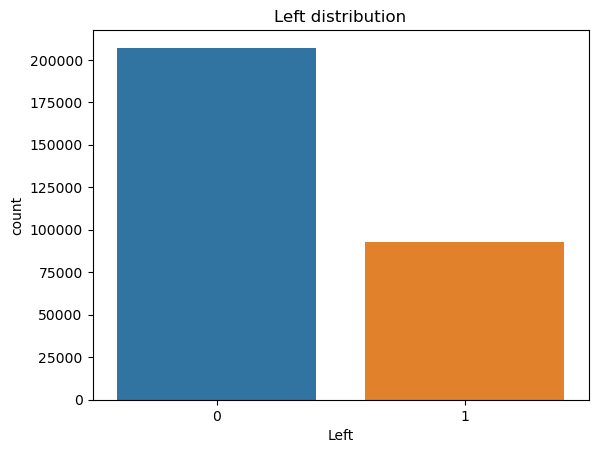

In [12]:
sns.countplot(data = df, x = 'Left')
plt.title('Left distribution', loc='Center')

 **The count values of 0 are very high compared to 1**

# Feature Selection
1. Domain Understanding - Understanding why an employee could resign
2. Correlation - Finding Correlation between left and other columns
3. Using Random Forest and decision trees

1. Domain Understanding - Understanding why an employee could resign

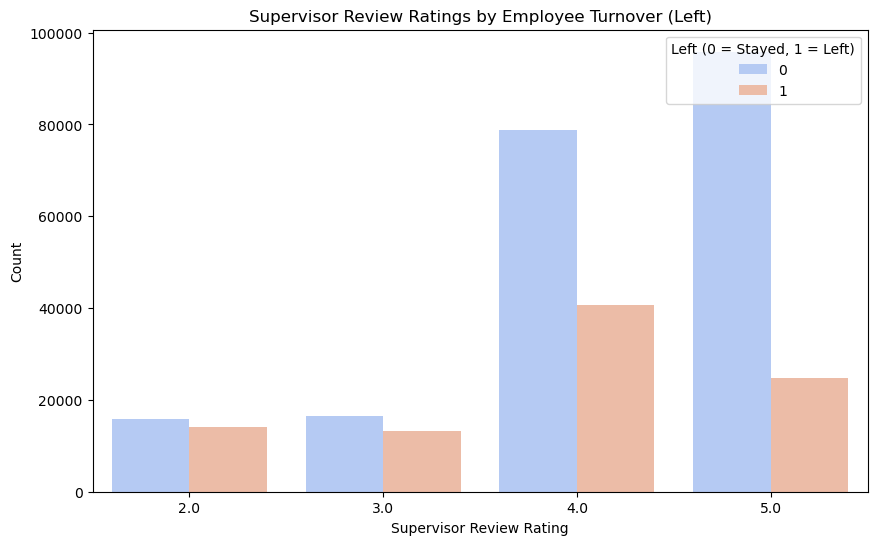

In [13]:
# Supervisor review could be an important parameeter
plt.figure(figsize=(10, 6))
sns.countplot(x='SupervisorReview', hue='Left', data=df, palette="coolwarm")
plt.title('Supervisor Review Ratings by Employee Turnover (Left)')
plt.xlabel('Supervisor Review Rating')
plt.ylabel('Count')
plt.legend(title='Left (0 = Stayed, 1 = Left)', loc='upper right')
plt.show()


**This shows that there is a pattern. People who get 4 or 5 ratings stay longer**



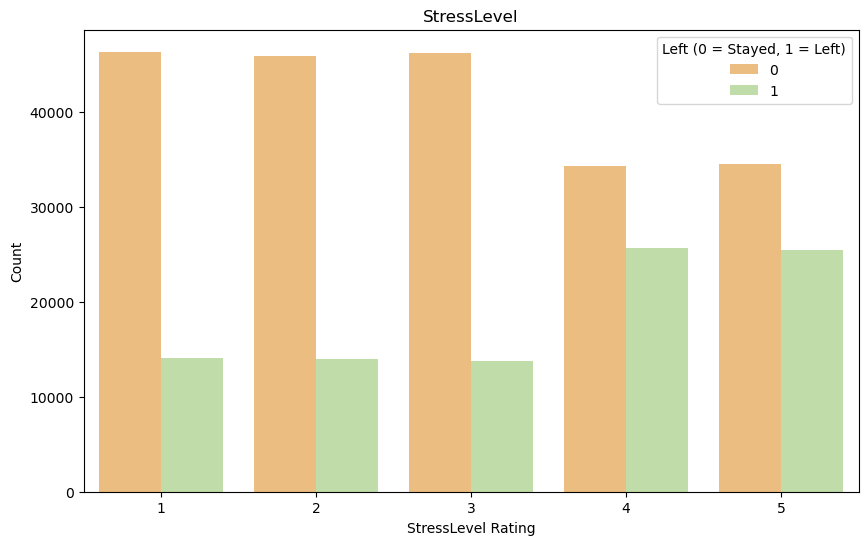

In [14]:
# stress level could be a major characterstic to leave job  www
plt.figure(figsize=(10, 6))
sns.countplot(x='StressLevel', hue='Left', data=df, palette="Spectral")
plt.title('StressLevel')
plt.xlabel('StressLevel Rating')
plt.ylabel('Count')
plt.legend(title='Left (0 = Stayed, 1 = Left)', loc='upper right')
plt.show()


**the stress level rating increases from 1.0 to 5.0, there seems to be a trend where the proportion of employees who left increases. This suggests a relationship between stress levels and the likelihood of leaving.**

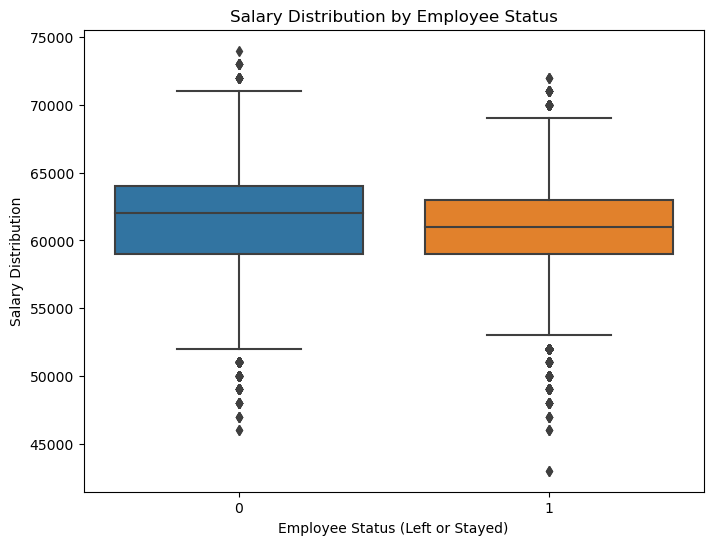

In [15]:
# Visualizing Work Satisfaction distribution by Employee Status
plt.figure(figsize=(8,6))
sns.boxplot(x='Left', y='Salary', data=df)
plt.title("Salary Distribution by Employee Status")
plt.xlabel("Employee Status (Left or Stayed)")
plt.ylabel("Salary Distribution")
plt.show()


**The distribution of salaries for both categories appears similar, with overlapping interquartile ranges. Both categories have some outliers at both the lower and higher ends, showing a few employees with significantly lower or higher salaries than the general range.**

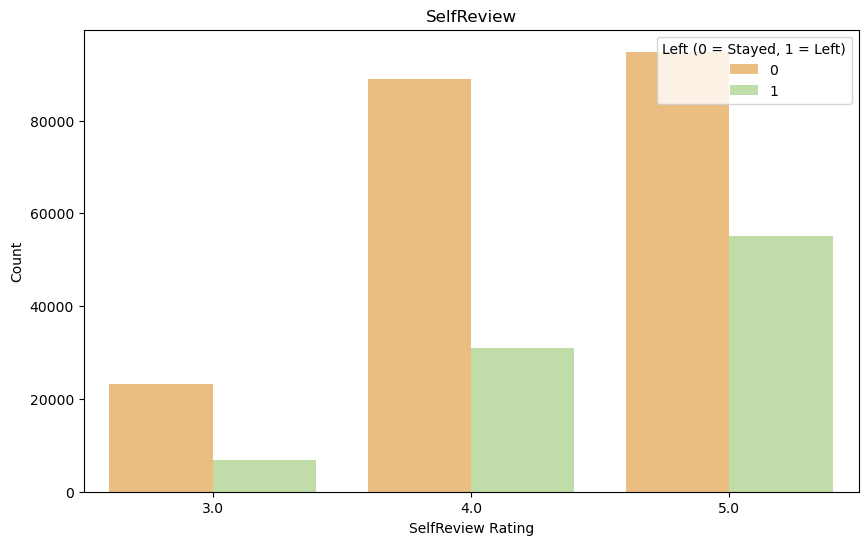

In [16]:
# Displaying the self review rating
plt.figure(figsize=(10, 6))
sns.countplot(x='SelfReview', hue='Left', data=df, palette="Spectral")
plt.title('SelfReview')
plt.xlabel('SelfReview Rating')
plt.ylabel('Count')
plt.legend(title='Left (0 = Stayed, 1 = Left)', loc='upper right')
plt.show()


**The chart suggests that higher self-review ratings correlate with higher retention, but even among high ratings, there is still a substantial number of employees leaving but it shows a pattern**


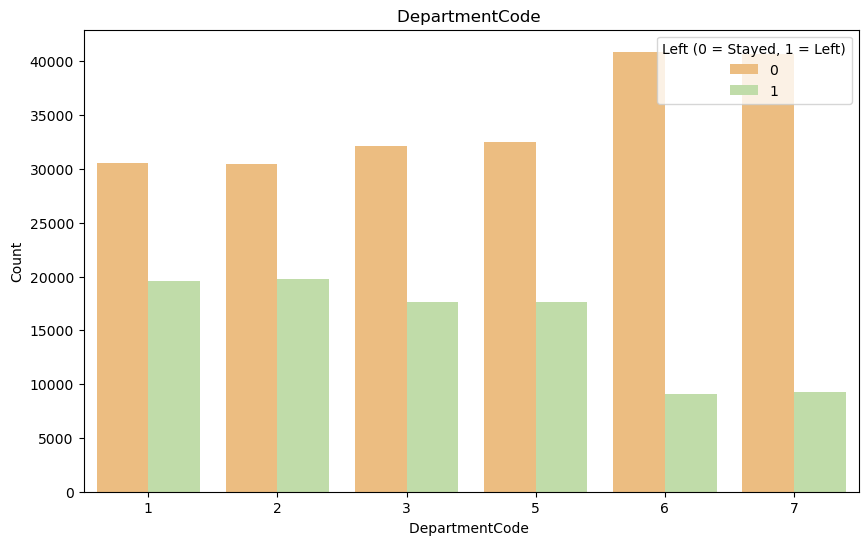

In [17]:
# Department code analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='DepartmentCode', hue='Left', data=df, palette="Spectral")
plt.title('DepartmentCode ')
plt.xlabel('DepartmentCode ')
plt.ylabel('Count')
plt.legend(title='Left (0 = Stayed, 1 = Left)', loc='upper right')
plt.show()


In department codes 6 and 7, the count of employees who stayed is significantly higher than those who left. This suggests that these departments have higher retention rates compared to other departments.
The smaller number of leavers in departments 6 and 7 might indicate that these departments provide more job security, satisfaction, or incentives, contributing to lower turnover.  1 to 5, there is a noticeable distribution between employees who stayed and those who left .

# Creating Features

JobMentalWellbeing gives an idea about the overall work environment impact on person

In [18]:
df['JobMentalWellbeing'] = df[['PeerFeedbackScore', 'WorkSatisfactionScore', 'JobEngagementScore']].mean(axis=1)

# Display the first few rows to confirm
df[['PeerFeedbackScore', 'WorkSatisfactionScore', 'JobEngagementScore', 'JobMentalWellbeing']].head()

,PeerFeedbackScore,WorkSatisfactionScore,JobEngagementScore,JobMentalWellbeing
0,3,1,5,3.000000
1,4,7,9,6.666667
2,3,8,4,5.000000
3,4,3,4,3.666667
4,1,5,1,2.333333


Calculating percentage increase because people have some expectations regarding their salary increase and could impact staying or leaving


In [19]:
# Calculating percentage increase and adding it as a new column
df['Salary_Percentage_Increase'] = ((df['Salary'] - df['PreviousSalary']) / df['PreviousSalary']) * 100

# Display the first few rows to confirm
df[['PreviousSalary', 'Salary', 'Salary_Percentage_Increase']].head()


,PreviousSalary,Salary,Salary_Percentage_Increase
0,59000.0,60000.0,1.694915
1,61000.0,64000.0,4.918033
2,61000.0,63000.0,3.278689
3,58000.0,61000.0,5.172414
4,61000.0,62000.0,1.639344


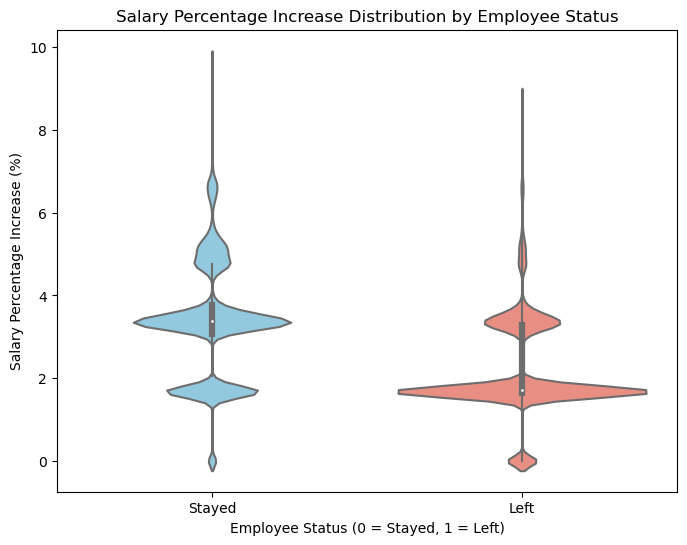

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Left', y='Salary_Percentage_Increase', data=df, palette=['skyblue', 'salmon'])
plt.title("Salary Percentage Increase Distribution by Employee Status")
plt.xlabel("Employee Status (0 = Stayed, 1 = Left)")
plt.ylabel("Salary Percentage Increase (%)")
plt.xticks([0, 1], ['Stayed', 'Left'])

plt.show()

The plot suggests that employees who stayed generally experienced a broader and higher range of salary increases compared to those who left.
The "Left" group has a narrower range and appears to peak at lower salary increase values, suggesting that employees who left received smaller increases on average.


#Calculating correlation score to choose features carefully. Since the correlation being used is Pearsons correlation. It strictly uses numeric values hence choosing numeric columns


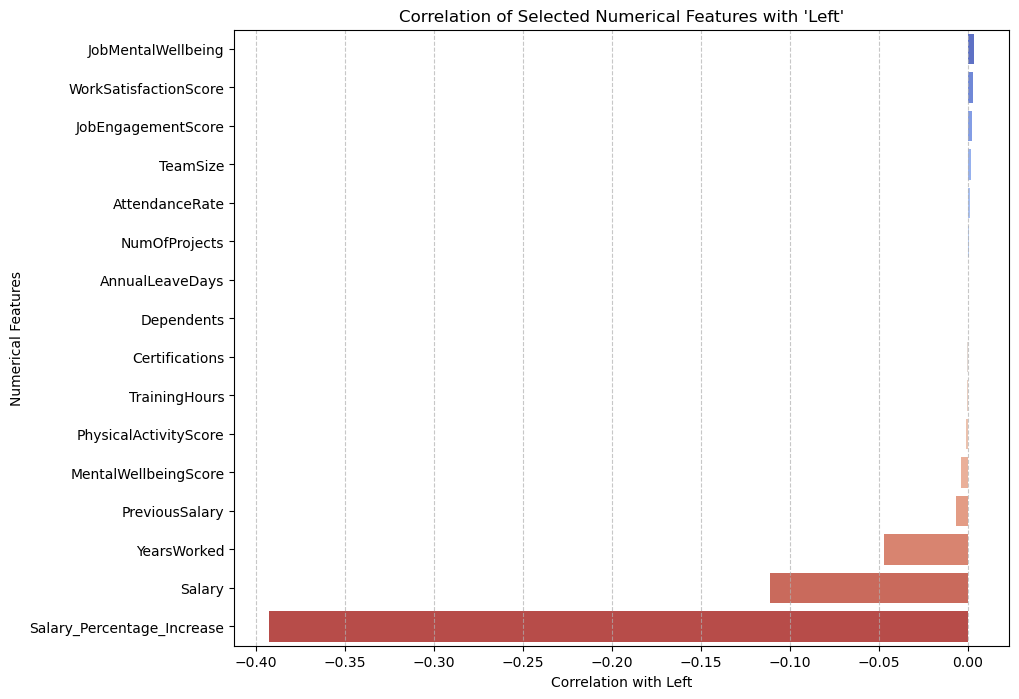

In [21]:
#correlation

# Specifying only the selected columns for correlation analysis (Some features are ambiguous. Considering some of the features as numeric)
selected_numerical_features = [
    'YearsWorked', 'TrainingHours', 'AttendanceRate', 'AnnualLeaveDays', 'Dependents',
    'Certifications', 'PreviousSalary', 'Salary', 'TeamSize', 'NumOfProjects',
    'WorkSatisfactionScore', 'JobEngagementScore', 'PhysicalActivityScore', 'MentalWellbeingScore','JobMentalWellbeing', 'Salary_Percentage_Increase',
]

# Calculate correlations of 'Left' with only the selected numerical features
left_correlations = df[selected_numerical_features].corrwith(df['Left']).sort_values(ascending=False)

# Convert correlations to DataFrame for easier plotting
left_correlations_df = left_correlations.to_frame(name='Correlation').reset_index()
left_correlations_df.rename(columns={'index': 'Feature'}, inplace=True)

# Plotting the bar plot for correlations
plt.figure(figsize=(10, 8))
sns.barplot(data=left_correlations_df, x='Correlation', y='Feature', palette="coolwarm")
plt.title("Correlation of Selected Numerical Features with 'Left'")
plt.xlabel("Correlation with Left")
plt.ylabel("Numerical Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



The correlation values suggest:
1. Salary Percentage
2. Salary
3. Years Worked
4. Previous Salary
5. Mental well being
6. Jobmentall Well being
7. Work Satisfication


Random Forest Feature Importance

In [22]:
df_encoded = df.copy()

# Applying label encoding for binary categorical features on the copy
binary_features = ['Gender', 'MentorshipReceived', 'OnsiteOpportunities', 'SkillDevelopmentCourses']
for feature in binary_features:
    df_encoded[feature] = LabelEncoder().fit_transform(df_encoded[feature])

# Applying one-hot encoding for multi-category categorical features on the copy
df_encoded = pd.get_dummies(df_encoded, columns=[
    'Distance', 'DepartmentCode', 'WorkLifeBalance', 'JobInvolvement',
    'TechSkillLevel', 'StressLevel', 'PeerFeedbackScore', 'ProjectComplexity',
    'SelfReview', 'SupervisorReview'
], drop_first=True)

# Defining target column and features
target_column = 'Left'
feature_columns = [col for col in df_encoded.columns if col != target_column]

# Preparing data for training
X = df_encoded[feature_columns]
y = df_encoded[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculating feature importances
rf_feature_importances = rf_model.feature_importances_


In [23]:
# As the one hot encoder converts everything into different columns, we are Mapping the column name with divided feature importances back to their original column names
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_feature_importances
})

# Extracting the base column names (e.g., 'PeerFeedbackScore' from 'PeerFeedbackScore_2.0')
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].str.split('_').str[0]

# Summing the importances by original column
aggregated_importance = feature_importance_df.groupby('BaseFeature')['Importance'].sum().reset_index()

# Sorting by total importance and display top features
aggregated_importance = aggregated_importance.sort_values(by='Importance', ascending=False)

print("Top 10 Original Features by Importance:")
for _, row in aggregated_importance.head(10).iterrows():
    print(f"{row['BaseFeature']}: {row['Importance']:.4f}")

Top 10 Original Features by Importance:
Salary: 0.2542
StressLevel: 0.0842
DepartmentCode: 0.0737
SupervisorReview: 0.0690
Distance: 0.0516
SelfReview: 0.0353
AttendanceRate: 0.0330
TrainingHours: 0.0304
YearsWorked: 0.0295
AnnualLeaveDays: 0.0263


Decision Tree Feature Importance

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Calculating feature importances
dt_feature_importances = dt_model.feature_importances_

# Mapping feature importances to feature names
feature_importance = list(zip(feature_columns, dt_feature_importances))
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)



In [25]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': dt_feature_importances
})

# Extracting the base column names (e.g., 'PeerFeedbackScore' from 'PeerFeedbackScore_2.0')
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].str.split('_').str[0]

# Calculating the sum of importances by original column
aggregated_importance = feature_importance_df.groupby('BaseFeature')['Importance'].sum().reset_index()

# Sorting by total importance and display top features
aggregated_importance = aggregated_importance.sort_values(by='Importance', ascending=False)

# Displaying the top 10 original features by aggregated importance
print("Top 10 Original Features by Importance (Decision Tree):")
for _, row in aggregated_importance.head(10).iterrows():
    print(f"{row['BaseFeature']}: {row['Importance']:.4f}")

Top 10 Original Features by Importance (Decision Tree):
Salary: 0.2211
DepartmentCode: 0.1325
StressLevel: 0.1178
Distance: 0.0771
SupervisorReview: 0.0767
SelfReview: 0.0404
AttendanceRate: 0.0354
YearsWorked: 0.0293
TrainingHours: 0.0284
AnnualLeaveDays: 0.0223


The common features from Random forest and decision tree
1. Salary
2. PreviousSalary
3. DepartmentCode
4. SupervisorReview
5. StressLevel
6. Distance
7. AttendanceRate
8. YearsWorked
9. TrainingHours

# Pipeline

**Analysis of Data characterstics:**

**Numerical Features**

YearsWorked: Represents the total number of years an employee has worked.

TrainingHours: The number of hours an employee has spent in training.

AttendanceRate: A measure of how frequently the employee attends work.

AnnualLeaveDays: The number of leave days taken by the employee..

PreviousSalary: The employee’s salary in a previous period or position.

Salary: The employee's current salary. Salary level is typically a key factor influencing employee satisfaction and retention.

MentalWellbeingScore: A score representing the employee's mental wellbeing, which could impact productivity, job satisfaction, and retention.

DepartmentCode: A numeric code representing the department the employee works in.

SupervisorReview: A score from the supervisor’s review of the employee.

StressLevel: A measure of the employee's stress.

JobMentalWellbeing: Combines peer feedback, work satisfaction, and job engagement scores to give an overall view of the employee's mental wellbeing in relation to their job.

Salary_Percentage_Increase: The percentage increase in salary from a previous period. Higher increases may be linked with retention,

**Categorical Features**

Distance: The distance between the employee's home and workplace (e.g., <5 miles, ~10 miles, >30 miles).

Gender: The employee's gender. This feature can be examined for potential differences in satisfaction, salary, or retention trends.

MentorshipReceived: Indicates whether the employee has received mentorship

In [26]:
numerical_features = [
    'YearsWorked', 'TrainingHours', 'AttendanceRate',
    'AnnualLeaveDays', 'PreviousSalary', 'Salary', 'MentalWellbeingScore', 'DepartmentCode', 'SupervisorReview', 'StressLevel','JobMentalWellbeing', 'Salary_Percentage_Increase']

categorical_features = [
    'Distance', 'Gender', 'MentorshipReceived'
]

num_pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),
                           ('standardize', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_categ', SimpleImputer(strategy='most_frequent')),
                          ('create_categ', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('num pipeline', num_pipeline, numerical_features),
                                                      ('cat pipeline', cat_pipeline, categorical_features)])

processing_pipeline

ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['YearsWorked', 'TrainingHours',
                                  'AttendanceRate', 'AnnualLeaveDays',
                                  'PreviousSalary', 'Salary',
                                  'MentalWellbeingScore', 'DepartmentCode',
                                  'SupervisorReview', 'StressLevel',
                                  'JobMentalWellbeing',
                                  'Salary_Percentage_Increase']),
                                ('cat pipeline',
                                 Pipeline(steps=[('impute_categ',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_categ',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Distance', 'Gender', 'MentorshipReceived'])])

# Models

# Metrics
**Recall:**

Recall measures how well the model identifies employees who actually left.
High recall is crucial when the goal is to catch as many true "Left" cases as possible, minimizing missed detections.

**F1:**

This metric is especially useful for imbalanced data because it penalizes models that have high false positives or false negatives, ensuring more reliable predictions for both classes. The F1 score balances precision and recall, giving a better picture of the model's performance on each class.

**Precision:**

Precision as a metric in this context is helpful but may not be the best primary metric. Precision helps assess how many employees predicted to leave actually do leave, which is valuable.

**Why we are not using accuracy ?**

The dataset is imbalanced, meaning one class (likely "Stayed") has significantly more samples than the other ("Left").
In imbalanced data, a model can achieve high accuracy by simply predicting the majority class most of the time, which overlooks the minority class.

In [27]:
X = df[numerical_features + categorical_features]

y = df['Left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models for evaluation
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Baseline Evaluation on Imbalanced Data with focus on Precision, Recall, and F1 Score for both 'Stayed' and 'Left' classes
print("Baseline Evaluation on Imbalanced Data (Focused on Precision, Recall, and F1 Score ):\n")
baseline_results = {}
for model_name, model in models.items():
    # Define pipeline with specified classifier
    pipeline = Pipeline([
        ('preprocessing', processing_pipeline),
        ('classifier', model)
    ])

    # Fitting and evaluating on imbalanced data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculating precision, recall, and F1 score for both 'Stayed' and 'Left' classes
    report = classification_report(y_test, y_pred, target_names=['Stayed', 'Left'], output_dict=True)
    stayed_precision = report['Stayed']['precision']
    stayed_recall = report['Stayed']['recall']
    stayed_f1_score = report['Stayed']['f1-score']
    left_precision = report['Left']['precision']
    left_recall = report['Left']['recall']
    left_f1_score = report['Left']['f1-score']

    # Storing and displaying results focused on both classes
    baseline_results[model_name] = {
        "Precision (Stayed)": stayed_precision,
        "Recall (Stayed)": stayed_recall,
        "F1 Score (Stayed)": stayed_f1_score,
        "Precision (Left)": left_precision,
        "Recall (Left)": left_recall,
        "F1 Score (Left)": left_f1_score
    }
    print(f"{model_name} - Precision (Stayed): {stayed_precision:.4f}, Recall (Stayed): {stayed_recall:.4f}, F1 Score (Stayed): {stayed_f1_score:.4f}")
    print(f"{model_name} - Precision (Left): {left_precision:.4f}, Recall (Left): {left_recall:.4f}, F1 Score (Left): {left_f1_score:.4f}\n")

Baseline Evaluation on Imbalanced Data (Focused on Precision, Recall, and F1 Score ):

Logistic Regression - Precision (Stayed): 0.8196, Recall (Stayed): 0.8975, F1 Score (Stayed): 0.8568
Logistic Regression - Precision (Left): 0.7091, Recall (Left): 0.5583, F1 Score (Left): 0.6247

Random Forest - Precision (Stayed): 0.8942, Recall (Stayed): 0.8994, F1 Score (Stayed): 0.8968
Random Forest - Precision (Left): 0.7722, Recall (Left): 0.7621, F1 Score (Left): 0.7671

Decision Tree - Precision (Stayed): 0.8610, Recall (Stayed): 0.8651, F1 Score (Stayed): 0.8630
Decision Tree - Precision (Left): 0.6952, Recall (Left): 0.6877, F1 Score (Left): 0.6914



On this imbalanced data set

**Logistic:** Moderate precision (0.7087) and low recall (0.5583), with a low F1 score (0.6246), showing it struggles to capture employees likely to leave.

**Random ForestLeft:** Moderate precision (0.7722) and recall (0.7621) with an F1 score of 0.7671, making it the most balanced model for both classes on imbalanced data.

**Decision Tree:** Lower precision (0.6952), recall (0.6877), and F1 score (0.6914), revealing a tendency to misclassify employees who left, with some bias toward the majority class.

In [28]:
# Performing undersampling
sample_size = min(df['Left'].value_counts())
df_bal = df.groupby('Left').apply(lambda x: x.sample(sample_size)).reset_index(drop=True)


Now the values are balanced

In [29]:
X_bal = df_bal[numerical_features + categorical_features]
y_bal = df_bal['Left']

# Splitting the balanced data into training and test sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Models for evaluation

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluation on Balanced Data with focus on Precision, Recall, and F1 Score
print("Evaluation on Balanced Data (Focused on Precision, Recall, and F1 Score for 'Stayed' and 'Left' Classes):\n")
balanced_results = {}
for model_name, model in models.items():
    # Define pipeline with specified classifier
    pipeline = Pipeline([
        ('preprocessing', processing_pipeline),
        ('classifier', model)
    ])

    # Fitting and evaluating on balanced data
    pipeline.fit(X_train_bal, y_train_bal)
    y_pred = pipeline.predict(X_test_bal)

    # Calculating precision, recall, and F1 score for both 'Stayed' and 'Left' classes
    report = classification_report(y_test_bal, y_pred, target_names=['Stayed', 'Left'], output_dict=True)
    stayed_precision = report['Stayed']['precision']
    stayed_recall = report['Stayed']['recall']
    stayed_f1_score = report['Stayed']['f1-score']
    left_precision = report['Left']['precision']
    left_recall = report['Left']['recall']
    left_f1_score = report['Left']['f1-score']

    # Storing and displaying results focused on both classes
    balanced_results[model_name] = {
        "Precision (Stayed)": stayed_precision,
        "Recall (Stayed)": stayed_recall,
        "F1 Score (Stayed)": stayed_f1_score,
        "Precision (Left)": left_precision,
        "Recall (Left)": left_recall,
        "F1 Score (Left)": left_f1_score
    }
    print(f"{model_name} - Precision (Stayed): {stayed_precision:.4f}, Recall (Stayed): {stayed_recall:.4f}, F1 Score (Stayed): {stayed_f1_score:.4f}")
    print(f"{model_name} - Precision (Left): {left_precision:.4f}, Recall (Left): {left_recall:.4f}, F1 Score (Left): {left_f1_score:.4f}\n")


Evaluation on Balanced Data (Focused on Precision, Recall, and F1 Score for 'Stayed' and 'Left' Classes):

Logistic Regression - Precision (Stayed): 0.7747, Recall (Stayed): 0.7551, F1 Score (Stayed): 0.7648
Logistic Regression - Precision (Left): 0.7617, Recall (Left): 0.7809, F1 Score (Left): 0.7712

Decision Tree - Precision (Stayed): 0.8020, Recall (Stayed): 0.8160, F1 Score (Stayed): 0.8089
Decision Tree - Precision (Left): 0.8132, Recall (Left): 0.7990, F1 Score (Left): 0.8060

Random Forest - Precision (Stayed): 0.9010, Recall (Stayed): 0.7934, F1 Score (Stayed): 0.8438
Random Forest - Precision (Left): 0.8159, Recall (Left): 0.9131, F1 Score (Left): 0.8617



Key Observations after balancing the data

**Logistic Regression: **Improved precision (0.76), recall (0.78), and F1 (0.76) for "Left," creating a more balanced performance across both classes.

**Decision Tree:** Precision (0.8177), recall (0.8005), and F1 (0.8090) improved for "Left," enhancing ability to identify potential leavers.

**Random Forest:** Precision (0.8191), recall (0.9126), and F1 (0.8633) for "1" improved significantly, making it the most balanced and effective model.

Cross Validation 5 fold to check the average f1 score to confirm which model is better. Since F1 gives a balance of both precision and recall using it for the CV

In [30]:
models = {
    # "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Cross-Validation Results Storage
cv_results = {}

# Perform cross-validation on the balanced dataset for each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline([
        ('preprocessing', processing_pipeline),
        ('classifier', model)
    ])

    # Perform 5-fold cross-validation, using F1 score (macro) to balance across classes
    scores = cross_val_score(pipeline, X_bal, y_bal, cv=5, scoring='f1_macro')

    # Store and display cross-validation results
    cv_results[model_name] = scores
    print(f"{model_name} - Cross-Validation F1 Score: {scores.mean():.4f} ± {scores.std():.4f}")


Decision Tree - Cross-Validation F1 Score: 0.8071 ± 0.0008
Random Forest - Cross-Validation F1 Score: 0.8534 ± 0.0009


Random Forest outperforms the Decision Tree model in terms of F1 score, indicating it is likely a better choice for the problem. The higher F1 score and low variance across folds say that Random Forest is capturing more detailed relationships in the data while maintaining consistent performance.


Next Steps: Based on these cross-validation results,  prioritizing Random Forest and decision for hyperparameter tuning, as it has shown better baseline performance and stability.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Simplified Random Forest parameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200],  # fewer values
    'classifier__max_depth': [None, 10, 20],  # fewer values
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True]
}

# Simplified Logistic Regression parameter grid
logreg_param_grid = {
    'classifier__penalty': ['l2'],  # only one penalty to avoid high computation
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['lbfgs']  # solver compatible with l2 penalty
}

# Define pipelines
RandomForest_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

LRegression_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', LogisticRegression(random_state=42))
])

# Run hyperparameter tuning with reduced iterations in RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    RandomForest_pipeline, param_distributions=rf_param_grid,
    n_iter=3, cv=3, scoring='roc_auc', n_jobs=1, random_state=42
)

# Run hyperparameter tuning with reduced iterations in RandomizedSearchCV for Logistic Regression
logreg_random_search = RandomizedSearchCV(
    LRegression_pipeline, param_distributions=logreg_param_grid,
    n_iter=3, cv=3, scoring='roc_auc', n_jobs=1, random_state=42
)

# Fit and find the best model for Random Forest
X_train_bal_sampled = X_train_bal.sample(frac=0.3, random_state=42)
y_train_bal_sampled = y_train_bal.loc[X_train_bal_sampled.index]

rf_random_search.fit(X_train_bal_sampled, y_train_bal_sampled)
best_rf = rf_random_search.best_estimator_
print("Best Random Forest Parameters:", rf_random_search.best_params_)

# Fit and find the best model for Logistic Regression
logreg_random_search.fit(X_train_bal_sampled, y_train_bal_sampled)
best_logreg = logreg_random_search.best_estimator_
print("Best Logistic Regression Parameters:", logreg_random_search.best_params_)


Best Random Forest Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Best Logistic Regression Parameters: {'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__C': 1}


In [32]:
# Corrected parameter grid for Decision Tree
dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__criterion': ['gini', 'entropy']
}

# Pipeline with Decision Tree Classifier
dt_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# RandomizedSearchCV for hyperparameter tuning
dt_random_search = RandomizedSearchCV(
    dt_pipeline,
    param_distributions=dt_param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

# Fitting to the balanced training data
dt_random_search.fit(X_train_bal, y_train_bal)

# Displaying the best hyperparameters
best_dt = dt_random_search.best_estimator_
print("Best Decision Tree Parameters:", dt_random_search.best_params_)


Best Decision Tree Parameters: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 8, 'classifier__max_features': None, 'classifier__max_depth': 10, 'classifier__criterion': 'gini'}


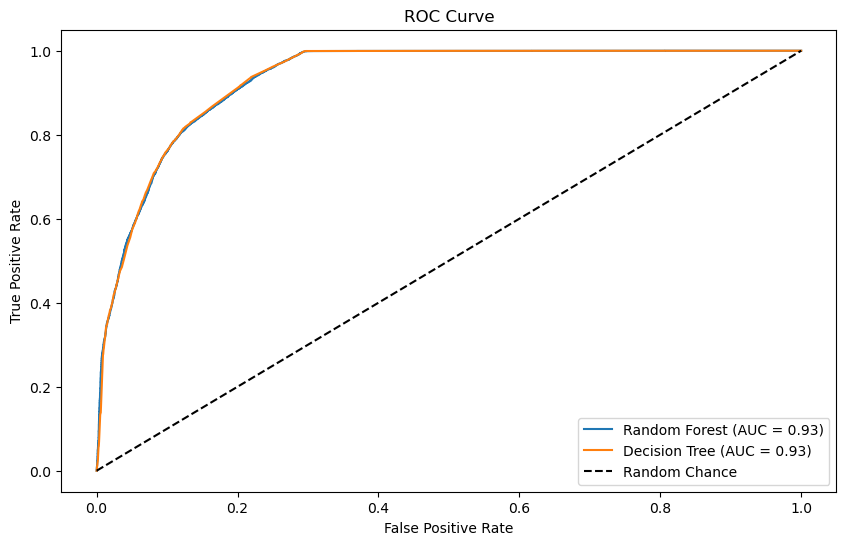

In [33]:
from sklearn.metrics import roc_curve, auc 
def plot_roc_curve(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plotting ROC curves for Random Forest and Decision Tree
plt.figure(figsize=(10, 6))

# Plotting for Random Forest
plot_roc_curve(best_rf, X_test_bal, y_test_bal, "Random Forest")

# Plotting for Decision Tree
plot_roc_curve(best_dt, X_test_bal, y_test_bal, "Decision Tree")

# Plotting a random chance line
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

# Labeling the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

This high AUC indicates that Random Forest has strong distinguishing  power,  between employees who are likely to stay and those who are likely to leave. The performance of Decision Tree is also very similar to Random Forest. Comparing different parameters. Random Forest is better

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Predicting on the test set using the best Random Forest model
y_pred_rf = best_rf.predict(X_test_bal)
rf_accuracy = accuracy_score(y_test_bal, y_pred_rf)
rf_precision = precision_score(y_test_bal, y_pred_rf, average='binary')  # Added precision
rf_f1 = f1_score(y_test_bal, y_pred_rf, average='binary')
rf_recall = recall_score(y_test_bal, y_pred_rf, average='binary')

print("Random Forest - Precision:", rf_precision)
print("Random Forest - F1 Score:", rf_f1)
print("Random Forest - Recall:", rf_recall)


Random Forest - Precision: 0.8089641341355347
Random Forest - F1 Score: 0.8663619789715541
Random Forest - Recall: 0.9325268817204301


In [35]:
# Predict on the test set using the best Decision Tree model
y_pred_dt = best_dt.predict(X_test_bal)
dt_accuracy = accuracy_score(y_test_bal, y_pred_dt)
dt_precision = precision_score(y_test_bal, y_pred_dt, average='binary')
dt_f1 = f1_score(y_test_bal, y_pred_dt, average='binary')
dt_recall = recall_score(y_test_bal, y_pred_dt, average='binary')


print("Decision Tree - Precision:", dt_precision)
print("Decision Tree - F1 Score:", dt_f1)
print("Decision Tree - Recall:", dt_recall)


Decision Tree - Precision: 0.8109872685724945
Decision Tree - F1 Score: 0.8685662912369203
Decision Tree - Recall: 0.9349462365591398


After the hyperparameters tuning, the Random Forest model is considered the best one for the prediction of the employee turnover since the recall and F1 score for the ‘‘Left’’ class are high enough to identify the potential leavers and the precision balanced at the same level.

Interestingly, another algorithm, Decision Tree model, also showed increased accuracy, precision, and recall values and provided a very effective and simple way to provide valuable information on the major causes of turnover but slightly is less efficient than Random Forest algorithm.

In total, the best level of tuning of overall Random Forest model appears to offer near equal across the board performance while specializing in the miniature of potential leavers’ categorization, which may be highly valuable in certain contexts where capturing these unique groups is of paramount importance, keeping the Decision Tree model as a useful tool when trying to investigate unique factors that may influence retention.

# Model conclusion
 Both Decision Tree and Random Forest classifiers were effective in predicting what type of employees would leave the company next, each one offereing distinct advantages of their own. The decision tree model is very useful when it comes to interpretability and high recall for identifying employees that are at most at risk of leaving the company. Random Forest offers a very robust generability with a slightly reduced feature set. For this project, Random forest is a better option since it offers more scalibility and efficiency.
 
 Random Forest has consistently performed better

# **Project Outcomes**




**Supervisor Engagement:**

The ML model analysis highlighted SupervisorReview as a top feature influencing whether employees stay or leave. Higher supervisor ratings were associated with greater retention, suggesting the importance of positive supervisory relationships. This insight was derived from both feature importance scores and data visualizations showing retention patterns based on supervisor ratings.

Stress Management:
StressLevel emerged as a significant predictor in the Random Forest and Decision Tree models. Employees with higher stress levels were more likely to leave, as observed in the visual analysis and feature importance rankings. This finding supports the recommendation to implement stress management strategies to improve retention, based on the model’s prioritization of stress as a critical factor.
Salary and Growth:

Salary and Salary_Percentage_Increase were shown to be among the most influential features in predicting turnover. The models indicated that lower salary increases correlated with higher turnover rates, suggesting that competitive pay progression is essential for retaining talent. This insight comes from the model’s feature importance analysis and supports salary review policies.
Department-Specific Retention Efforts:

DepartmentCode was another top feature in predicting turnover, with certain departments exhibiting significantly lower turnover rates. This finding, supported by the model, suggests that department-specific factors impact retention and indicates that replicating the positive aspects of high-retention departments could benefit other areas.
Employee Wellbeing:

The engineered feature JobMentalWellbeing (combining satisfaction, engagement, and peer feedback scores) was shown to influence retention in the models. This insight indicates that an overall focus on mental wellbeing, derived from model predictions, could reduce turnover.




